In [26]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns

In [27]:
data = pd.read_csv('../netflix_titles.csv')
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Visualize shows vs movies

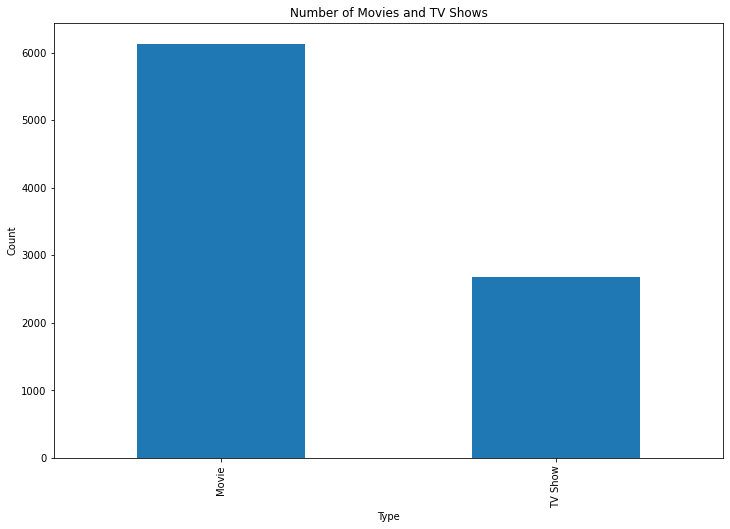

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
data['type'].value_counts().plot(kind='bar')
plt.title('Number of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


Movies and shows in each year

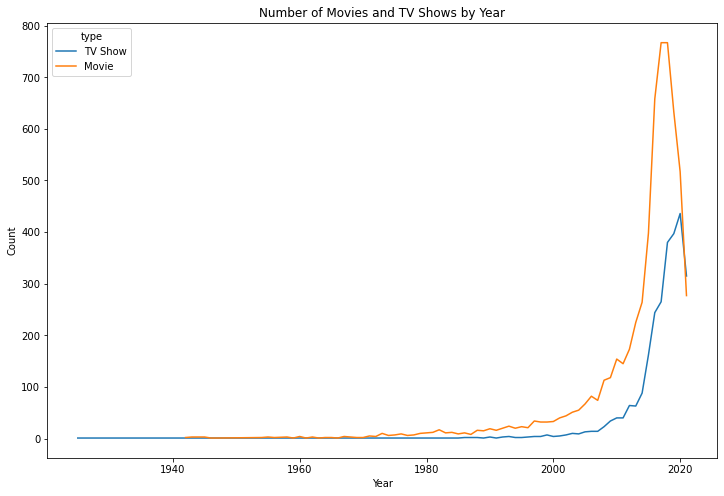

In [29]:
plt.figure(figsize=(12, 8))
# draw line plot
draw_data = data.groupby(['release_year', 'type']).size().reset_index(name='count')
sns.lineplot(x='release_year', y='count', data=draw_data, hue='type')
plt.title('Number of Movies and TV Shows by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [30]:
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

Visualize 10 shows in each year. (I am showing 10 shows in each year. I did not figure out how can i show the titles of the 10 shows in each year. Below the graph, I show them separately.)

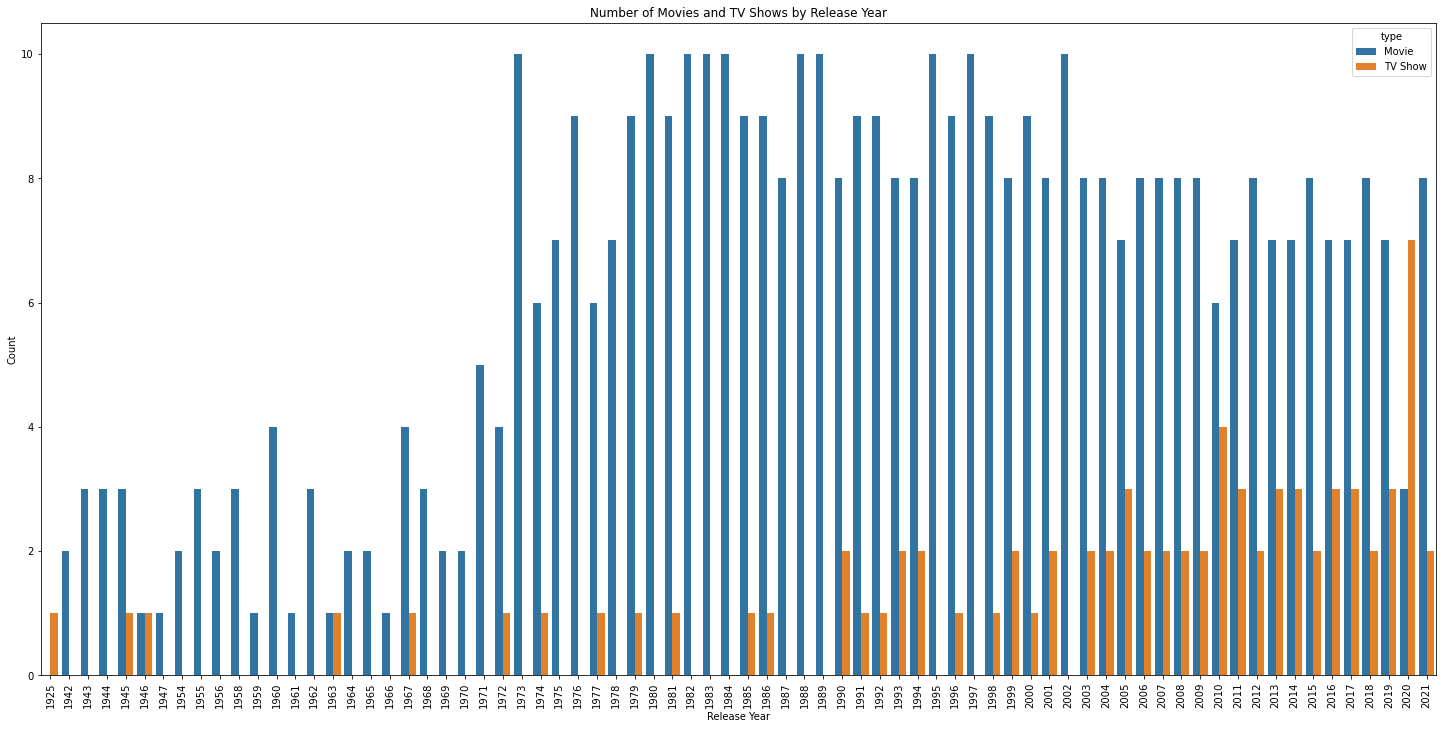

In [31]:
#sort the data by release year
sorted_data = data.sort_values(by=['release_year'], ascending=False)

# group the data 10 shows by release year
sorted_data = sorted_data.groupby(['release_year']).head(10)

# plot the data
plt.figure(figsize=(25, 12))
sns.countplot(x='release_year', hue='type', data=sorted_data)
plt.title('Number of Movies and TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [32]:
# show the 10 shows in each year

for year in sorted_data['release_year'].unique():
    print(year)
    print(sorted_data[sorted_data['release_year'] == year]['title'].values)
    print('\n')

2021
['Ali & Ratu Ratu Queens' 'Black Holes | The Edge of All We Know'
 'Sweet & Sour' 'Sweet Tooth' "Trippin' with the Kandasamys" 'Xtreme'
 'Alan Saldaña: Locked Up' "Creator's File: GOLD" 'Dancing Queens'
 'Myriam Fares: The Journey']


2020
['We Are the Champions' 'Babylon Berlin' 'Flavorful Origins' 'The Crown'
 'My Next Guest Needs No Introduction With David Letterman'
 'Fat Ballerina - David A. Arnold' 'Caliphate'
 'Fukrey Boyzzz: Space Mein Fukrapanti' 'She'
 'Taylor Tomlinson: Quarter-Life Crisis']


2019
['Eurovision Song Contest' 'ReMastered: The Two Killings of Sam Cooke'
 'The Body' 'The Brawler' 'Cuddle Weather'
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS" 'Pachamama'
 'Romance is a bonus book' 'Super Bheem' 'Daddy Issues']


2018
['The Mayo Clinic' 'Pick of the Litter' 'Tremors 6: A Cold Day in Hell'
 'El testigo' 'Taken' 'Phamous' 'Peter Rabbit' 'Travel Mates 2' 'Wildlife'
 'The Mortified Guide']


2017
['Ryan Hamilton: Happy Face' 'Surviving Escobar - Alias JJ' 'LA 92'
 

Visualize 10 shows in each genre

In [33]:
unique_genres = data['listed_in'].unique()
unique_genres = [x.split(', ') for x in unique_genres]
unique_genres = [item for sublist in unique_genres for item in sublist]
unique_genres.sort()
unique_genres = list(dict.fromkeys(unique_genres))
print(unique_genres)

['Action & Adventure', 'Anime Features', 'Anime Series', 'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'International TV Shows', "Kids' TV", 'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV', 'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']


I get unique genres as above. Some rows have more than 1 genre. So I decided to remove them to get graph about shows that has one genre.

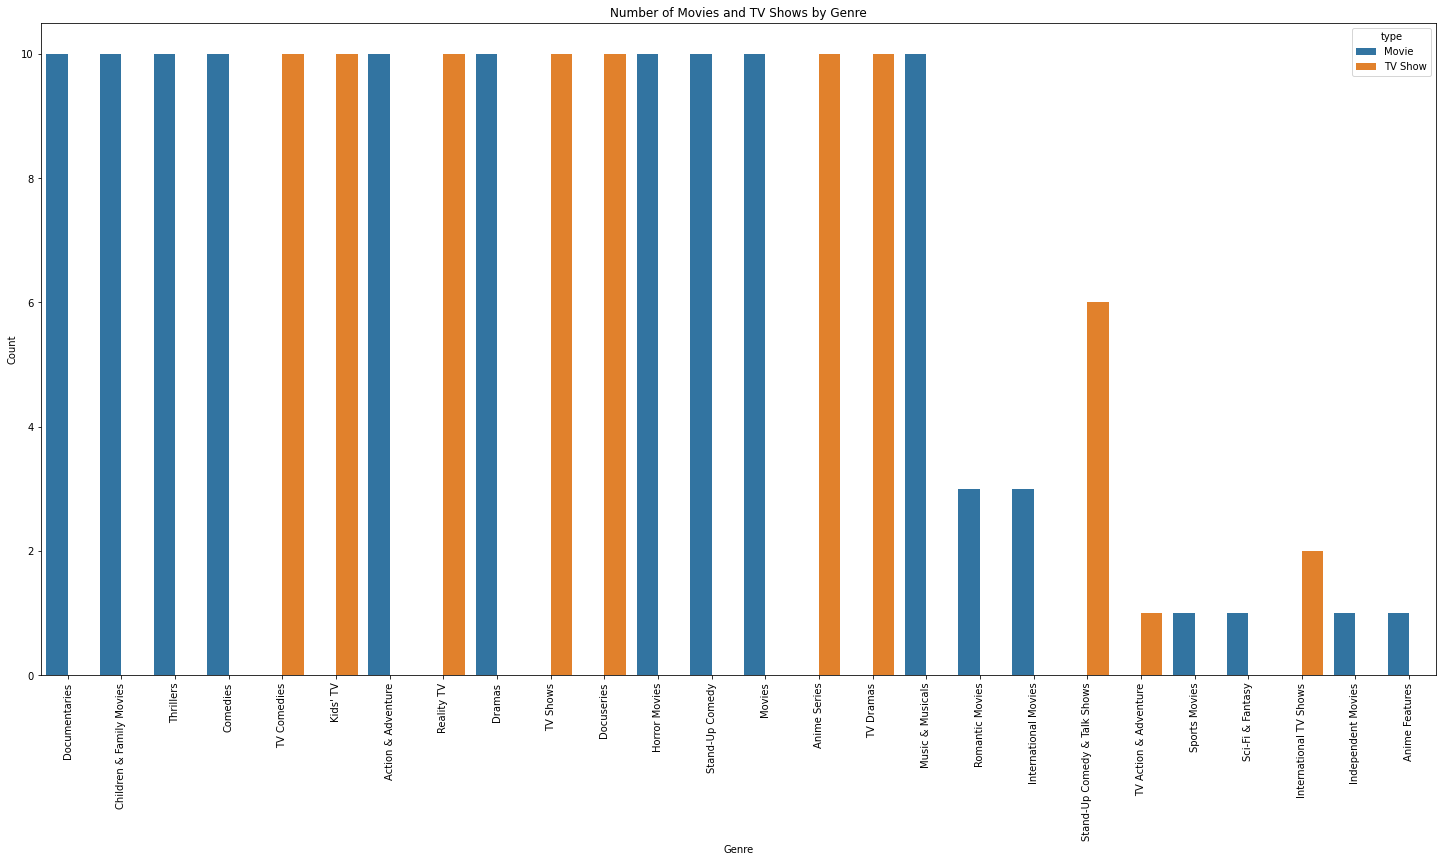

In [34]:
# group the data by genre
genre_data = data.groupby(['listed_in']).head(10)

for genre in genre_data['listed_in'].unique():
    if genre in unique_genres:
        continue
    else:
        genre_data = genre_data.drop(genre_data[genre_data['listed_in'] == genre].index)
                

# plot the data
plt.figure(figsize=(25, 12))
sns.countplot(x='listed_in', hue='type', data=genre_data)
plt.title('Number of Movies and TV Shows by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



In [35]:
# show 10 shows in each genre
for title in genre_data['listed_in'].unique():
    print(title)
    print(genre_data[genre_data['listed_in'] == title]['title'].values)
    print('\n')

Documentaries
['Dick Johnson Is Dead' 'My Heroes Were Cowboys' 'Final Account'
 'Bob Ross: Happy Accidents, Betrayal & Greed'
 'Lady Boss: The Jackie Collins Story' 'Fantastic Fungi'
 '9to5: The Story of a Movement' 'This Changes Everything' 'FTA'
 'Headspace: Unwind Your Mind']


Children & Family Movies
['My Little Pony: A New Generation'
 'Go! Go! Cory Carson: Chrissy Takes the Wheel' 'Nightbooks'
 'A StoryBots Space Adventure' 'You vs. Wild: Out Cold'
 'Firedrake the Silver Dragon' 'Chhota Bheem - Dinosaur World'
 'Chhota Bheem - Neeli Pahaadi' 'Chhota Bheem & Ganesh'
 'Chhota Bheem & Krishna: Mayanagari']


Thrillers
['Intrusion' 'Paranoia' 'In the Cut' 'In Too Deep' 'The Net'
 'Hostage House' 'Lethal Love' 'The Game' 'Lying and Stealing'
 'Domestic Disturbance']


Comedies
['Grown Ups' 'Janoskians: Untold and Untrue' 'Welcome Home Roscoe Jenkins'
 'Major Payne' 'Poms' 'Austin Powers: International Man of Mystery'
 'Not Another Teen Movie' 'The Upshaws - The Afterparty'
 'The Circ

Visualize Distribution of shows by country (There are many countries so graph is not readable. In below I give top 10 Distribution of shows by country)

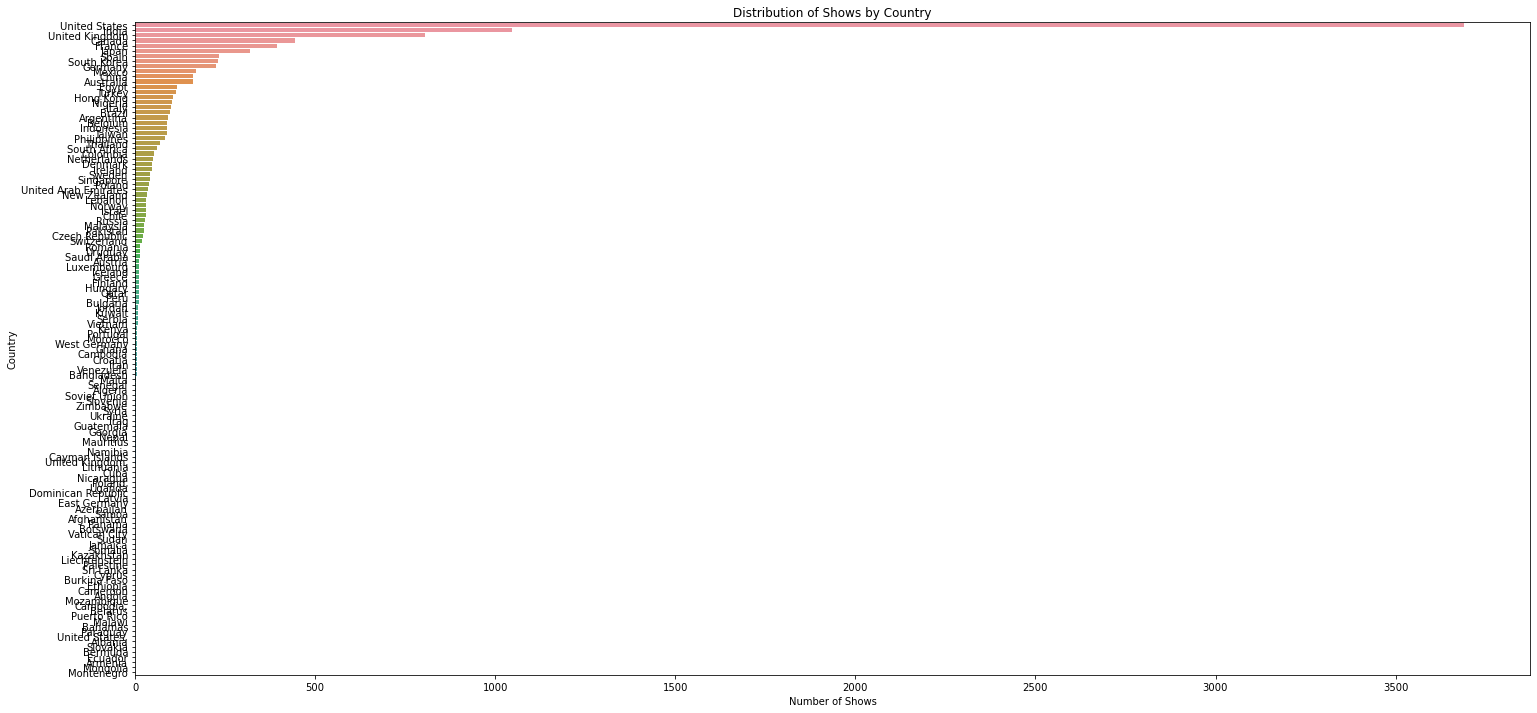

In [38]:
#Visualize Distribution of shows by country
plt.figure(figsize=(25, 12))
country_data = data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.barplot(y=country_data.value_counts().index, x=country_data.value_counts().values)
plt.title('Distribution of Shows by Country')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()


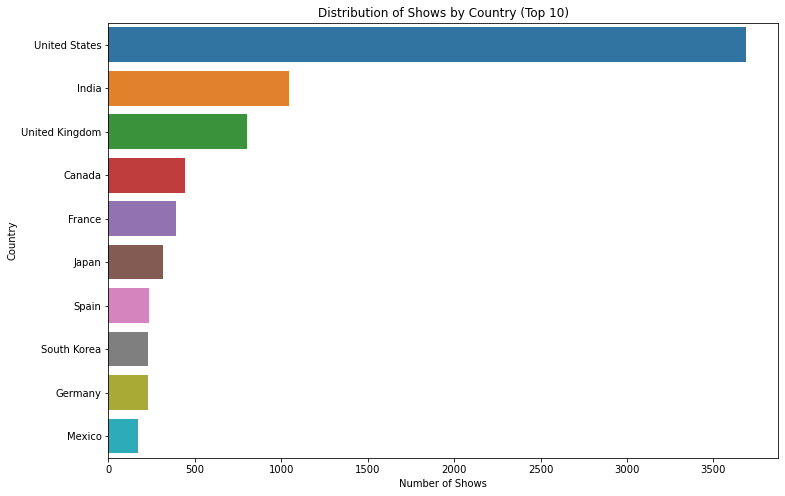

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(y=country_data.value_counts().index[:10], x=country_data.value_counts().values[:10])
plt.title('Distribution of Shows by Country (Top 10)')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

Data Cleaning and preparation

In [40]:
# Required cols are : type, title, director, cast, country, release_year, rating, duration, listed_in'
data = data[['type', 'title', 'director', 'cast', 'country', 'release_year', 'rating', 'duration', 'listed_in']]
data.head()

type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water              NaN   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans              NaN   
4  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   

                                           listed_in  
0                                      Documentaries  
1    International TV Shows, TV Dramas, TV Mysteries  
2  Crime TV Shows, International TV Shows, TV Act...  
3                             Docuseries, Reality TV  
4  International TV Shows, Romantic TV Shows, TV ...

In [41]:
# Check for null values
data.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [42]:
# delete rows with null values
data = data.dropna()
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [43]:
data.shape

(5332, 9)

Narrowing data to get better results in use case 2. (Detail explanation in the document)

In [45]:
data[:2448].tail(10)

type                         title                     director  \
4524  Movie         Tales From the Hood 2  Rusty Cundieff, Darin Scott   
4525  Movie         Mo Amer: The Vagabond                  Stan Lathan   
4526  Movie                        Pulang                 Kabir Bhatia   
4528  Movie               Seven in Heaven                Chris Eigeman   
4532  Movie                    Malevolent                Olaf de Fleur   
4533  Movie                  Private Life               Tamara Jenkins   
4537  Movie              The Black Prince                     Kavi Raz   
4538  Movie                 Truth or Dare                   Nick Simon   
4539  Movie    Death Race: Beyond Anarchy             Don Michael Paul   
4540  Movie  Eric ldle's What About Dick?     Eric Idle, Aubrey Powell   

                                                   cast  \
4524  Keith David, Bryan Batt, Alexandria Deberry, B...   
4525                                            Mo Amer   
4526              Puteri Aishah, Remy Ishak, Alvin Wong   
4528  Travis Tope, Haley Ramm, Jacinda Barrett, Gary...   
4532  Florence Pugh, Ben Lloyd-Hughes, Celia Imrie, ...   
4533  Paul Giamatti, Kathryn Hahn, Kayli Carter, Mol...   
4537  Satinder Sartaaj, Shabana Azmi, Jason Flemyng,...   
4538  Cassandra Scerbo, Brytni Sarpy, Mason Dye, Har...   
4539  Zach McGowan, Danny Glover, Frederick Koehler,...   
4540  Russell Brand, Billy Connolly, Tim Curry, Eric...   

                                   country  release_year rating duration  \
4524                         United States          2018      R  110 min   
4525                         United States          2018  TV-MA   57 min   
4526                              Malaysia          2018  TV-14  119 min   
4528                         United States          2018  PG-13   94 min   
4532                        United Kingdom          2018  TV-MA   89 min   
4533                         United States          2018      R  124 min   
4537  United Kingdom, India, United States          2017  PG-13  121 min   
4538                         United States          2017  TV-MA   88 min   
4539               United States, Bulgaria          2017      R  111 min   
4540                         United States          2012  TV-MA   81 min   

                                             listed_in  
4524    Cult Movies, Horror Movies, Independent Movies  
4525                                   Stand-Up Comedy  
4526  Action & Adventure, Dramas, International Movies  
4528                                     Horror Movies  
4532                          Horror Movies, Thrillers  
4533              Comedies, Dramas, Independent Movies  
4537                      Dramas, International Movies  
4538                                     Horror Movies  
4539                                Action & Adventure  
4540                        Comedies, Music & Musicals

In [46]:
# make data 2450 rows
data = data[:2448]
data.to_csv('../cleaned_netflix_data.csv', index=False)

Check created Mock Data (30.000 viewers)

In [47]:
viewers_data = pd.read_csv('../viewers.csv')
viewers_data.head()

username country_of_user                                         title  \
0   cjarrett0       Indonesia                                       Valeria   
1    rasbury1     New Zealand  The Massively Mixed-Up Middle School Mystery   
2      fedds2            Iraq                                           Boi   
3   amunehay3   United States                                  Super Deluxe   
4  dterrazzo4       Macedonia                               Chance Pe Dance   

  date_watched  percentage_watched  age  
0     1/7/2019                  92   21  
1   10/25/2015                  39   69  
2    8/17/2016                  37   77  
3    11/9/2019                  24   12  
4     9/8/2015                  85   50

In [48]:
ProfileReport(viewers_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]